# Τεχνικές Eξόρυξης Δεδομένων - Άσκηση 2
_Βαργιάμης Μιχαήλ, sdi1300018_

---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
#nltk.download('stopwords')
import copy

In [2]:
dftrue = pd.read_csv("True.csv")
dffake = pd.read_csv("Fake.csv")

In [3]:
print(dftrue.info())
print("\n==========================================\n")
print(dffake.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB
None


## Προεπεξεργασία - καθάρισμα

In [4]:
dftrue = dftrue.head(10)
dffake = dffake.head(10)

In [5]:
from nltk.corpus import stopwords

def str_lower(df, columns):
    for col in columns:
        df[col] = df[col].str.lower()
    return df

def remove_punctuation(df, columns):
    for col in columns:
        df[col] = df[col].str.replace(r'[^\w\s]+', '')
    return df

def remove_stopwords(df, columns):
    stop = stopwords.words('english')
    for col in columns:
        df[col] = df[col].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    return df

## Μελέτη των δεδομένων

#### α)

#### β)

In [6]:
def avg_char_count(df, column):
    return sum([ sum([1 for c in s if c.isalpha() or c.isdigit() ]) for s in df[column] ])/ len(df)

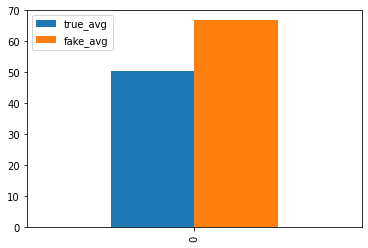

In [7]:
pd.DataFrame({
    "true_avg": [avg_char_count(dftrue, "title")],
    "fake_avg": [avg_char_count(dffake, "title")],
}).plot.bar()
None

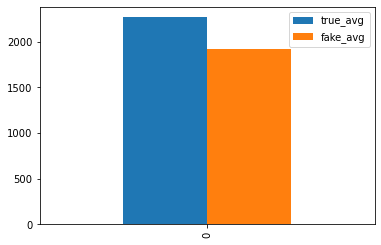

In [8]:
pd.DataFrame({
    "true_avg": [avg_char_count(dftrue, "text")],
    "fake_avg": [avg_char_count(dffake, "text")],
}).plot.bar()
None

#### γ) και δ)

In [9]:
from collections import Counter

def plot_word_count(df, col):
    count = [len(s) for s in df[col]]
    dftemp = pd.DataFrame({
        "count": count
    })
    dftemp.hist(bins=20, column='count')

In [10]:
dftruestop = copy.deepcopy(dftrue)
dffakestop = copy.deepcopy(dffake)
dftruestop = remove_stopwords(dftruestop, ["title", "text"])
dffakestop = remove_stopwords(dffakestop, ["title", "text"])

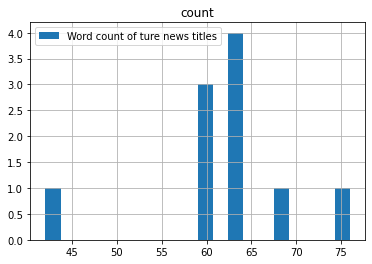

In [11]:
plot_word_count(dftrue, 'title')
plt.legend(["Word count of ture news titles"])
None

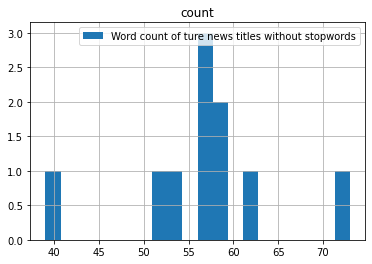

In [12]:
plot_word_count(dftruestop, 'title')
plt.legend(["Word count of ture news titles without stopwords"])
None

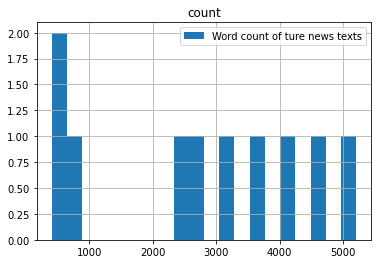

In [13]:
plot_word_count(dftrue, 'text')
plt.legend(["Word count of ture news texts"])
None

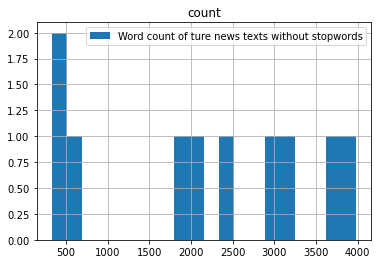

In [14]:
plot_word_count(dftruestop, 'text')
plt.legend(["Word count of ture news texts without stopwords"])
None

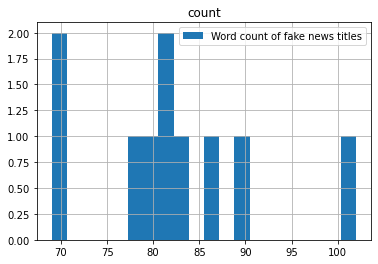

In [15]:
plot_word_count(dffake, 'title')
plt.legend(["Word count of fake news titles"])
None

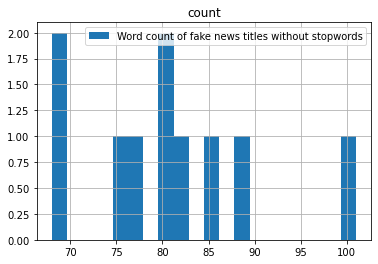

In [16]:
plot_word_count(dffakestop, 'title')
plt.legend(["Word count of fake news titles without stopwords"])
None

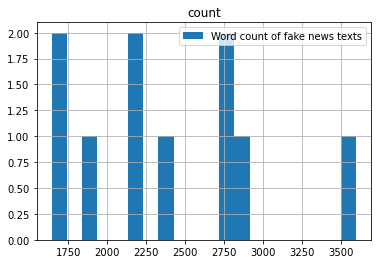

In [17]:
plot_word_count(dffake, 'text')
plt.legend(["Word count of fake news texts"])
None

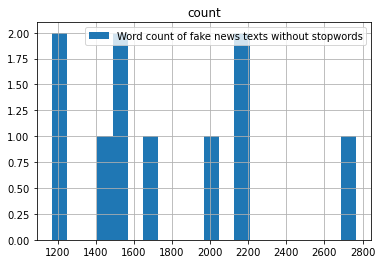

In [18]:
plot_word_count(dffakestop, 'text')
plt.legend(["Word count of fake news texts without stopwords"])
None

## Δημιουργία συνόλου εκμάθησης και δοκιμής

In [19]:
# Define split size
size = len(dftrue)
splitsize = int(0.5 * len(dftrue))

# Split dftrue to train and test
dftraintrue = dftrue.head(splitsize)
dftesttrue = dftrue.tail(size - splitsize)

# Add labels
dftraintrue.insert(4, "label", [1 for i in range(splitsize)])
dftesttrue.insert(4, "label", [1 for i in range(size - splitsize)])
#dftraintrue["label"] = [1 for i in range(splitsize)]
#dftesttrue["label"] = [1 for i in range(size - splitsize)]

# Split dffake to train and test
dftrainfake = dffake.head(size - splitsize)
dftestfake = dffake.tail(splitsize)

# Add labels
dftrainfake.insert(4, "label", [0 for i in range(size - splitsize)])
dftestfake.insert(4, "label", [0 for i in range(splitsize)])
#dftrainfake["label"] = [0 for i in range(size - splitsize)]
#dftestfake["label"] = [0 for i in range(splitsize)]

# Merge into dftrain and dftest respectively
dftrain = dftraintrue.append(dftrainfake, ignore_index=True)
dftest = dftesttrue.append(dftestfake, ignore_index=True)

# Write to csv
dftrain.to_csv("Train.csv")
dftest.to_csv("Test.csv")

## Classification